# Regularized Logistic Regression
As usual we will import our handy libraries.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Now loading our dataset and display top head rows and display its description

In [2]:
df = pd.read_csv("./Data/ex2data2.txt", header=None)
df.head()

,0,1,2
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [3]:
df.describe()

,0,1,2
count,118.000000,118.000000,118.000000
mean,0.054779,0.183102,0.491525
std,0.496654,0.519743,0.502060
min,-0.830070,-0.769740,0.000000
25%,-0.372120,-0.254385,0.000000
50%,-0.006336,0.213455,0.000000
75%,0.478970,0.646562,1.000000
max,1.070900,1.108900,1.000000


Now we will split our data into feature and prediction (label) and then we will plot our data

In [4]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

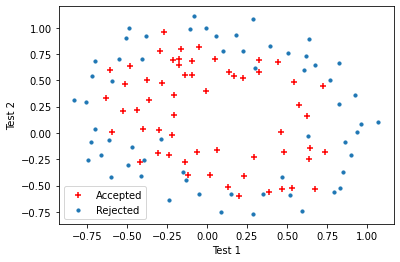

In [5]:
pos, neg = (y == 1).reshape(118, 1), (y == 0).reshape(118, 1)
plt.scatter(x[pos[:,0],0], x[pos[:,0],1], c = "r", marker = "+")
plt.scatter(x[neg[:,0],0], x[neg[:,0],1], marker = "o", s = 10)
plt.xlabel("Test 1")
plt.ylabel("Test 2")
plt.legend(["Accepted","Rejected"], loc = 0)

Plotting the data clearly shows that the decision boundary that separates the different classes is a non-linear one. This lead to the next step of feature mapping, where we add additional polynomial terms to try and better fit the data

Let's implement a feature mapping functiont<br>
Input: x1 -> feature<br>
&emsp; &emsp; &emsp; &ensp;x2 -> feature<br>
&emsp; &emsp; &emsp; &ensp;degree -> degree which the polynomial funcation will up to<br>


Output: all polynomial terms up to the given degreet<br>


In [6]:
def mapFeature(x1, x2, degree):
    out = np.ones(len(x1)).reshape(len(x1), 1)
    for i in range(1, degree+1):
        for j in range(i+1):
            terms = (x1**(i-j) * x2**j).reshape(len(x1), 1)
            out = np.hstack((out, terms))
    return out

Now let's test what we have done so far

In [7]:
X = mapFeature(x[:,0], x[:,1], 6)
print(X)

[[ 1.00000000e+00  5.12670000e-02  6.99560000e-01 ...  6.29470940e-04
   8.58939846e-03  1.17205992e-01]
 [ 1.00000000e+00 -9.27420000e-02  6.84940000e-01 ...  1.89305413e-03
  -1.39810280e-02  1.03255971e-01]
 [ 1.00000000e+00 -2.13710000e-01  6.92250000e-01 ...  1.04882142e-02
  -3.39734512e-02  1.10046893e-01]
 ...
 [ 1.00000000e+00 -4.84450000e-01  9.99270000e-01 ...  2.34007252e-01
  -4.82684337e-01  9.95627986e-01]
 [ 1.00000000e+00 -6.33640000e-03  9.99270000e-01 ...  4.00328554e-05
  -6.31330588e-03  9.95627986e-01]
 [ 1.00000000e+00  6.32650000e-01 -3.06120000e-02 ...  3.51474517e-07
  -1.70067777e-08  8.22905998e-10]]


Now the famous sigmoid <br>
Input: z -> weight<br>

In [8]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

Well it worked, Now let's implement our cost function<br>
Input: theta -> weights<br>
&emsp; &emsp; &emsp; &ensp;X -> features<br>
&emsp; &emsp; &emsp; &ensp;y -> class label<br>

Output: regCost -> regularize cost<br>
&emsp; &emsp; &emsp; &ensp; gradient -> the gradient

In [13]:
def costFunctionReg(theta, X, y, Lambda):
    m = len(y)
    y = y[:,np.newaxis]
    predications = sigmoid(X @ theta)
    error = (-y * np.log(predications)) - ((1 - y) * np.log(1 - predications))
    cost = 1/m * sum(error)
    regCost = cost + Lambda/(2*m) * sum(theta**2)

    j_0 = 1/m * (X.transpose() @ (predications - y))[0]
    j_1 = 1/m * (X.transpose() @ (predications - y))[1:] + (Lambda/m)* theta[1:]
    gradient = np.vstack((j_0[:,np.newaxis], j_1))
    return regCost[0], gradient

Now let's test what we have done so far by initialize a matrix and initialize "Lambda" = 1

In [14]:
# Initialize fitting parameters
initial_theta = np.zeros((X.shape[1], 1))

# Set regularization parameter lambda to 1
Lambda = 1

#Compute and display initial cost and gradient for regularized logistic regression
cost, gradient = costFunctionReg(initial_theta, X, y, Lambda)

In [15]:
print("Cost at initial theta (zeros):", cost)

Cost at initial theta (zeros): 0.6931471805599461


Now we will implement the * gradient descent * funcation<br>
Input: X -> features<br>
&emsp; &emsp; &emsp; &ensp;y -> actual value<br>
&emsp; &emsp; &emsp; &ensp;theta -> intial weights<br>
&emsp; &emsp; &emsp; &ensp;alpha -> learning rate<br>
&emsp; &emsp; &emsp; &ensp;num_iters -> number of iteration<br>

Output: theta -> optimized weights<br>
&emsp; &emsp; &emsp; &ensp; J_history -> cost per iteration (later will be used to plot the cost as to make sure our funcation works fine)

In [18]:
def gradientDescent(X, y, theta, alpha, num_iters, Lambda):
    m = len(y)
    J_history = []

    for i in range(num_iters):
        cost, gradient = costFunctionReg(theta, X, y, Lambda)
        theta = theta - (alpha * gradient)
        J_history.append(cost)
    
    return theta, J_history

In [19]:
theta , J_history = gradientDescent(X, y, initial_theta, 1, 800, 0.2)

In [20]:
print("The regularized theta using ridge regression:\n",theta)

The regularized theta using ridge regression:
 [[ 2.25319932]
 [ 1.44552306]
 [ 2.33283911]
 [-3.57008233]
 [-2.35002884]
 [-3.07090829]
 [ 0.50119267]
 [-0.88407626]
 [-0.69606495]
 [-0.22204243]
 [-2.69560917]
 [ 0.04161168]
 [-1.31573798]
 [-0.80286232]
 [-2.23101395]
 [-0.39638083]
 [-0.43758167]
 [ 0.09476652]
 [-0.69300577]
 [-0.78996079]
 [-0.45416815]
 [-2.01051679]
 [ 0.16446857]
 [-0.59855483]
 [ 0.11471778]
 [-0.73960173]
 [-0.52044034]
 [-1.38532427]]


Let's plot cost funcation 

Text(0.5, 1.0, 'Cost function using Gradient Descent')

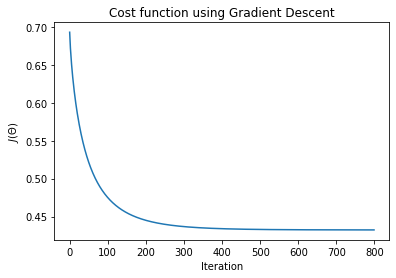

In [21]:
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

### Now let's plot Decision Boundary
Let's implement a feature mapping functiont<br>
Input: x1 -> feature<br>
&emsp; &emsp; &emsp; &ensp;x2 -> feature<br>
&emsp; &emsp; &emsp; &ensp;degree -> degree which the polynomial funcation will up to<br>


Output: all polynomial terms up to the given degreet<br>


In [24]:
def mapFeaturePlot(x1, x2, degree):
    out = np.ones(1)
    for i in range(1,degree+1):
        for j in range(i+1):
            terms= (x1**(i-j) * x2**j)
            out= np.hstack((out,terms))
    return out

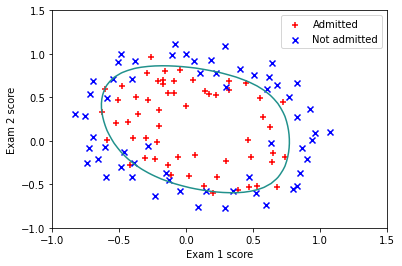

In [25]:
plt.scatter(X[pos[:,0],1],X[pos[:,0],2], c = "r", marker = "+", label = "Admitted")
plt.scatter(X[neg[:,0],1],X[neg[:,0],2],c = "b",marker = "x",label = "Not admitted")

# Plotting decision boundary

u_vals = np.linspace(-1, 1.5, 50)
v_vals= np.linspace(-1, 1.5, 50)
z=np.zeros((len(u_vals),len(v_vals)))
for i in range(len(u_vals)):
    for j in range(len(v_vals)):
        z[i,j] =mapFeaturePlot(u_vals[i],v_vals[j],6) @ theta 

plt.contour(u_vals,v_vals,z.T,0)
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(loc=0)

Now let's calculate our model accuracy<br>
Input: theta<br>
&emsp; &emsp; &emsp; &ensp;X<br>

In [26]:
def classifierPredict(theta,X):
    predictions = X.dot(theta)
    
    return predictions>0

In [27]:
p = classifierPredict(theta, X)
print("Train Accuracy:", (sum(p == y[:,np.newaxis])/len(y) *100)[0], "%")

Train Accuracy: 83.05084745762711 %
